   OLD_DL  OLD_UL  NEW_DL  NEW_UL
0  458.59  691.94  682.46  739.22
1  733.91  584.84  787.69  590.53
2  739.81  686.54  614.34  710.83
3  747.09  765.76  626.03  654.65
4  456.33  736.26  657.03  706.88 

           OLD_DL      OLD_UL      NEW_DL      NEW_UL
count    5.000000    5.000000    5.000000    5.000000
mean   627.146000  693.068000  673.510000  680.422000
std    154.973806   68.751114   69.181292   58.793377
min    456.330000  584.840000  614.340000  590.530000
25%    458.590000  686.540000  626.030000  654.650000
50%    733.910000  691.940000  657.030000  706.880000
75%    739.810000  736.260000  682.460000  710.830000
max    747.090000  765.760000  787.690000  739.220000


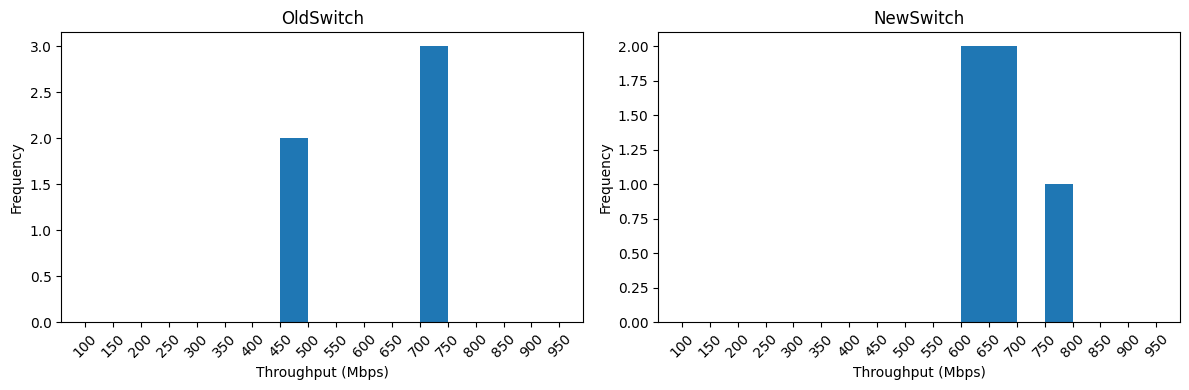

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data set and create a data frame
switch_throughput = pd.read_csv("benchmarks.csv", delimiter=";")
OldSwitch = switch_throughput['OLD_DL']
NewSwitch = switch_throughput['NEW_DL']

print(switch_throughput, "\n")

# Display summary statistics
print(switch_throughput.describe())

# Create a single figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax1 = axes[0]
ax1.set_title("OldSwitch")
ax1.set_xlabel("Throughput (Mbps)")
ax1.set_ylabel("Frequency")
ax1.hist(OldSwitch, bins=17, range=(100, 950))
ax1.set_xticks(np.arange(100, 950.1, 50))
# Rotate the x-axis labels by 90 degrees
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax2 = axes[1]
ax2.set_title("NewSwitch")
ax2.set_xlabel("Throughput (Mbps)")
ax2.set_ylabel("Frequency")
ax2.hist(NewSwitch, bins=17, range=(100, 950))
ax2.set_xticks(np.arange(100, 950.1, 50))
# Rotate the x-axis labels by 90 degrees
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.show()

In [23]:
# Two-sample t-test
import scipy.stats as stats

# Calculate t-critical value
alpha = 0.05
t_critical = stats.t.ppf(1-alpha, len(switch_throughput)-1)

# Compare samples by conducting the test
t_stat, p = stats.ttest_ind(OldSwitch, NewSwitch)
print("T-critical value:", t_critical)
print("T-statistic value:", t_stat)
print("P-value:", p)

# Mean of OldServer and NewServer
m1 = OldSwitch.mean()
m2 = NewSwitch.mean()
print("Mean of OldServer:", m1)
print("Mean of NewServer:", m2)

lower_bound1, upper_bound1 = stats.t.interval(1-alpha, len(OldSwitch)-1, loc=m1, scale=stats.sem(OldSwitch))
print("Confidence interval (Old server):", (lower_bound1, upper_bound1))

lower_bound2, upper_bound2 = stats.t.interval(1-alpha, len(NewSwitch)-1, loc=m2, scale=stats.sem(NewSwitch))
print("Confidence interval (New server):", (lower_bound2, upper_bound2))

T-critical value: 2.1318467813362902
T-statistic value: -0.6108682470204181
P-value: 0.5582392570523945
Mean of OldServer: 627.146
Mean of NewServer: 673.51
Confidence interval (Old server): (434.7206038888784, 819.5713961111215)
Confidence interval (New server): (587.6100804891485, 759.4099195108515)


In [24]:
print(OldSwitch.std())
print(stats.sem(OldSwitch))

154.9738064319258
69.30639318273604
